In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
train = pd.read_csv("Train (2).csv")
test = pd.read_csv("Test (2).csv")

In [144]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [145]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [146]:
print("shape for train data: ", train.shape)
print("shape for test data: ", test.shape)

shape for train data:  (23524, 13)
shape for test data:  (10086, 12)


In [147]:
print("Train data dtypes: ", train.dtypes)
print("Test data dtypes: ", test.dtypes)

Train data dtypes:  country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object
Test data dtypes:  country                   object
year                       int64
uniqueid                  object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object


In [148]:
print("Train data nulls: ", train.isna().sum())
print("Test data nulls: ", test.isna().sum())

Train data nulls:  country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64
Test data nulls:  country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [149]:
print("Train data duplicates: ", train.duplicated().sum())
print("Test data duplicates: ", test.duplicated().sum())

Train data duplicates:  0
Test data duplicates:  0


Distribution of bank_balance

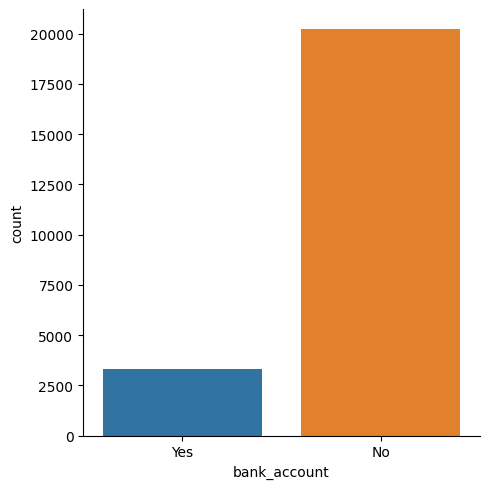

In [150]:
sns.catplot(x="bank_account", kind="count", data=train)

In [151]:
# ##function to change bank to int
def bank(df):
  if df=='Yes':
    return 1
  else:
     return 0

In [152]:
train['bank_account']=train['bank_account'].apply(bank)

In [153]:
# from sklearn.preprocessing import LabelEncoder

# categorical_columns = ['country', 'location_type', 'cellphone_access', 'gender_of_respondent',
#                        'relationship_with_head', 'marital_status', 'education_level', 'job_type', 'uniqueid']



# # Create the LabelEncoder object
# label_encoder = LabelEncoder()

# # Iterate over each column in the list and encode the values
# for col in categorical_columns:
#     train[col] = label_encoder.fit_transform(train[col])

# # Display the updated DataFrame
# train.head()



In [154]:
train = train.replace({'location_type' : { 'Rural' : 0, 'Urban' : 1}})
train = train.replace({'cellphone_access' : { 'Yes' : 1, 'No' : 0}})
train = train.replace({'gender_of_respondent' : { 'Female' : 0, 'Male' : 1}})
train = train.replace({'country' : { 'Rwanda' : 0, 'Tanzania' : 1, 'Kenya' : 2, 'Uganda' : 3}})
train = train.replace({'relationship_with_head' : { 'Head of Household' : 0, 'Spouse' : 1, 'Parent' : 2, 'Other relative' : 3, 'Other non-relatives' : 4, 'Child' : 5}})
train = train.replace({'marital_status' : { 'Married/Living together' : 0, 'Single/Never Married' : 1, 'Widowed' : 2, 'Divorced/Seperated' : 3, 'Dont know' : 4}})
train = train.replace({'education_level' : { 'Primary education' : 0, 'No formal education' : 1, 'Secondary education' : 2, 'Tertiary education' : 3, 'Vocational/Specialised training' : 4, 'Other/Dont know/RTA' : 5}})
train = train.replace({'job_type' : { 'Self employed' : 0, 'Informally employed' : 1, 'Farming and Fishing' : 2, 'Remittance Dependent' : 3, 'Other Income' : 4, 'Formally employed Private' : 5, 'No Income' : 6, 'Formally employed Government' : 7, 'Government Dependent' : 8, 'Dont Know/Refuse to answer' : 9}})

In [155]:
test = test.replace({'location_type' : { 'Rural' : 0, 'Urban' : 1}})
test = test.replace({'cellphone_access' : { 'Yes' : 1, 'No' : 0}})
test = test.replace({'gender_of_respondent' : { 'Female' : 0, 'Male' : 1}})
test = test.replace({'country' : { 'Rwanda' : 0, 'Tanzania' : 1, 'Kenya' : 2, 'Uganda' : 3}})
test = test.replace({'relationship_with_head' : { 'Head of Household' : 0, 'Spouse' : 1, 'Parent' : 2, 'Other relative' : 3, 'Other non-relatives' : 4, 'Child' : 5}})
test = test.replace({'marital_status' : { 'Married/Living together' : 0, 'Single/Never Married' : 1, 'Widowed' : 2, 'Divorced/Seperated' : 3, 'Dont know' : 4}})
test = test.replace({'education_level' : { 'Primary education' : 0, 'No formal education' : 1, 'Secondary education' : 2, 'Tertiary education' : 3, 'Vocational/Specialised training' : 4, 'Other/Dont know/RTA' : 5}})
test = test.replace({'job_type' : { 'Self employed' : 0, 'Informally employed' : 1, 'Farming and Fishing' : 2, 'Remittance Dependent' : 3, 'Other Income' : 4, 'Formally employed Private' : 5, 'No Income' : 6, 'Formally employed Government' : 7, 'Government Dependent' : 8, 'Dont Know/Refuse to answer' : 9}})

In [156]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['uniqueid']



# Create the LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each column in the list and encode the values
for col in categorical_columns:
    test[col] = label_encoder.fit_transform(test[col])

# Iterate over each column in the list and encode the values
for col in categorical_columns:
    train[col] = label_encoder.fit_transform(train[col])


In [157]:
# from sklearn.preprocessing import LabelEncoder

# categorical_columns = ['country', 'location_type', 'cellphone_access', 'gender_of_respondent',
#                        'relationship_with_head', 'marital_status', 'education_level', 'job_type', 'uniqueid']



# # Create the LabelEncoder object
# label_encoder = LabelEncoder()

# # Iterate over each column in the list and encode the values
# for col in categorical_columns:
#     test[col] = label_encoder.fit_transform(test[col])

# # Display the updated DataFrame
# test.head()

<Axes: >

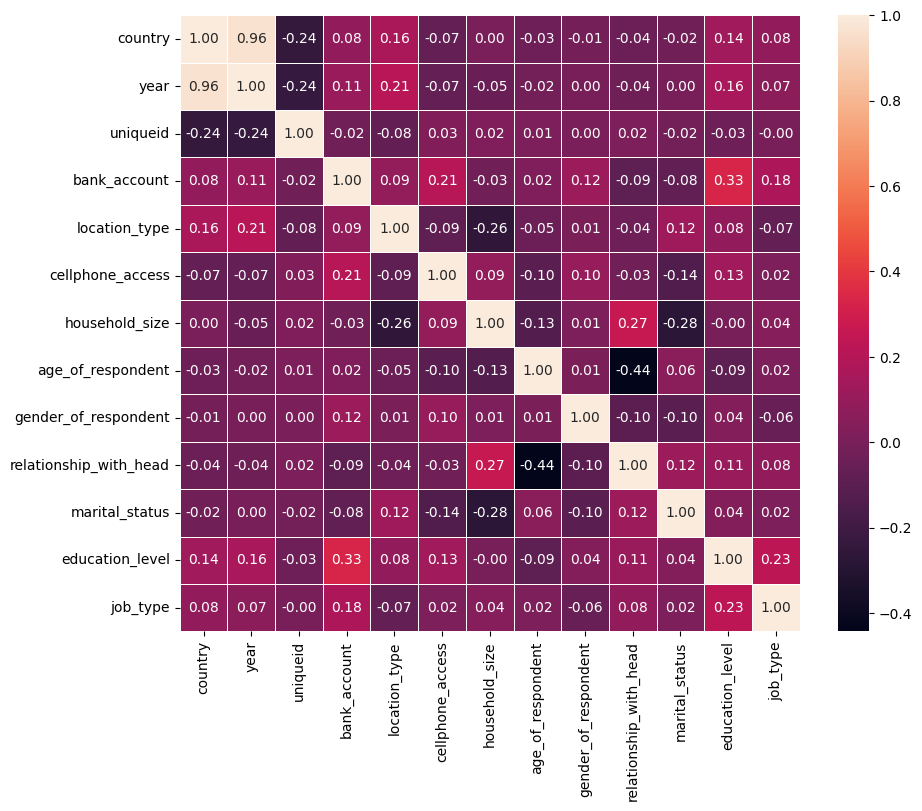

In [158]:
correlation_matrix = train.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as per your preference
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)

In [159]:
# from keras.models import Sequential
# from keras.layers import Dense

# # Define the model architecture
# model = Sequential()
# model.add(Dense(64, input_dim=len(train.columns) - 1, activation='relu'))  # Adjust input_dim as per your data
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))  # Binary classification, so sigmoid activation

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [160]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,2,2018,0,1,0,1,3,24,0,1,0,2,0
1,2,2018,1111,0,0,0,5,70,0,0,2,1,8
2,2,2018,2222,1,1,1,5,26,1,3,1,4,0
3,2,2018,3333,0,0,1,5,34,0,0,0,0,5
4,2,2018,4444,0,1,0,8,26,1,5,1,0,1


In [161]:
train=train.drop(columns=['year','relationship_with_head','marital_status','location_type','household_size','gender_of_respondent', 'country'])
test=test.drop(columns=['year','relationship_with_head','marital_status','location_type','household_size', 'gender_of_respondent', 'country'])


In [162]:
X_train = train.drop(columns=['bank_account','uniqueid'])
y_train = train['bank_account']

In [163]:
from imblearn.combine import SMOTEENN

# Create a SMOTE-ENN resampler
smote_enn = SMOTEENN(sampling_strategy='auto')

# Fit and transform your data
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)


In [164]:
from sklearn.preprocessing import StandardScaler

In [167]:
from keras.models import Sequential
from keras.layers import Dense

# Assuming your input data has, for example, 10 features
input_dim = 4

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [168]:


# Train the model
model.fit(X_resampled, y_resampled, epochs=30, batch_size=64)  # Adjust epochs and batch_size as needed


Epoch 1/30
295/295 [==============================] - 2s 2ms/step - loss: 0.5583 - accuracy: 0.7954
Epoch 2/30
295/295 [==============================] - 1s 2ms/step - loss: 0.2757 - accuracy: 0.8974
Epoch 3/30
295/295 [==============================] - 1s 2ms/step - loss: 0.2101 - accuracy: 0.9276
Epoch 4/30
295/295 [==============================] - 1s 2ms/step - loss: 0.1886 - accuracy: 0.9292
Epoch 5/30
295/295 [==============================] - 1s 2ms/step - loss: 0.1869 - accuracy: 0.9277
Epoch 6/30
295/295 [==============================] - 1s 2ms/step - loss: 0.1960 - accuracy: 0.9250
Epoch 7/30
295/295 [==============================] - 1s 2ms/step - loss: 0.1810 - accuracy: 0.9296
Epoch 8/30
295/295 [==============================] - 1s 2ms/step - loss: 0.1790 - accuracy: 0.9299
Epoch 9/30
295/295 [==============================] - 1s 2ms/step - loss: 0.1737 - accuracy: 0.9335
Epoch 10/30
295/295 [==============================] - 1s 2ms/step - loss: 0.1690 - accuracy: 0.9386

In [169]:
# Prepare test data for prediction
X_test=test.drop(['uniqueid'], axis=1)

In [170]:

# Predict on test data
predictions = model.predict(X_test)

316/316 [==============================] - 0s 1ms/step


In [ ]:
#binary_predictions

In [171]:
#train = train[(train['bank_account'] == 1)]
train

,uniqueid,bank_account,cellphone_access,age_of_respondent,education_level,job_type
0,0,1,1,24,2,0
1,1111,0,0,70,1,8
2,2222,1,1,26,4,0
3,3333,0,1,34,0,5
4,4444,0,0,26,0,1
...,...,...,...,...,...,...
23519,1239,0,1,48,1,4
23520,1240,0,1,27,2,4
23521,1241,0,1,27,0,4
23522,1242,0,1,30,2,0


In [172]:
sample = [[1,26,4,0]]
sample = np.array(sample)
ss=model.predict(sample)

1/1 [==============================] - 0s 37ms/step


In [173]:
ss

array([[0.9840923]], dtype=float32)

In [174]:
sample = [[1,48,1,4]]
sample = np.array(sample)
s=model.predict(sample)

1/1 [==============================] - 0s 41ms/step


In [175]:
s

array([[0.21787483]], dtype=float32)

In [176]:
from tensorflow.keras.models import save_model


model.save("model.h5")
